In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-09-24 13:24:50.844732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 13:24:52.279928: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%matplotlib inline

In [3]:
train_dataset = tf.data.experimental.load(
    "/home/annalena/PedestrianTrajectoryPrediction/datasets/crowdbot_test"
    )

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


2024-09-24 13:25:01.572661: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 13:25:01.774353: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 13:25:01.775255: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 13:25:01.777295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 13:25:01.777859: I tensorflow/compile

In [4]:
def prepare_data_2d(dataset, history_steps, predict_steps):
    X1_list, y_list, full_list = [], [], []
    for batch_x1, _ in dataset:
        batch_x1 = batch_x1.numpy()  # Convert Tensor to NumPy array
        batch_size = batch_x1.shape[0]
        for i in range(batch_size):
            sequence = batch_x1[i]
            
            # Take only the first two dimensions (2D positions)
            sequence = sequence[:, :2]
            
            if len(sequence) >= history_steps + predict_steps:
                input_seq = sequence[:history_steps]
                target_seq = sequence[history_steps:history_steps + predict_steps]
                X1_list.append(input_seq)
                y_list.append(target_seq)
                full_list.append(sequence)
    
    X1 = np.array(X1_list)
    y = np.array(y_list)
    full = np.array(full_list)
    
    return X1, y, full

# Prepare the data
history_steps = 5
predict_steps = 10
X1, y, seq = prepare_data_2d(train_dataset, history_steps, predict_steps)
print(f"Shape of X1: {X1.shape}")  # Should be (num_samples, history_steps, 2)
print(f"Shape of y: {y.shape}")    # Should be (num_samples, predict_steps, 2)
print(f"Shape of seq: {seq.shape}")    # Should be (num_samples, all_steps, 2)

Shape of X1: (1312, 5, 2)
Shape of y: (1312, 10, 2)
Shape of seq: (1312, 15, 2)


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 14913208657754708145


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_trajectory_scale(trajectories):
    """
    Analyzes the scale of the 2D trajectories and returns the ranges for x and y coordinates.
    
    Parameters:
    - trajectories: np.array of shape (n_trajectories, n_steps, 2)
    
    Returns:
    - A dictionary with min and max values for x and y coordinates.
    """
    # Get the min and max values for both x and y coordinates across all trajectories
    min_x = np.min(trajectories[:, :, 0])
    max_x = np.max(trajectories[:, :, 0])
    
    min_y = np.min(trajectories[:, :, 1])
    max_y = np.max(trajectories[:, :, 1])
    
    scale_info = {
        "x_range": (min_x, max_x),
        "y_range": (min_y, max_y)
    }
    
    print(f"x range: {min_x} to {max_x}")
    print(f"y range: {min_y} to {max_y}")
    
    return scale_info

def plot_trajectories(trajectories):
    """
    Plots the trajectories to visualize their range.
    
    Parameters:
    - trajectories: np.array of shape (n_trajectories, n_steps, 2)
    """
    plt.figure(figsize=(8, 6))
    for traj in trajectories:
        plt.plot(traj[:, 0], traj[:, 1], marker='o', markersize=3, label='Trajectory')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Trajectory Range Visualization')
    plt.grid(True)
    plt.show()

# Example usage
# trajectories = np.random.rand(100, 15, 2)  # Replace this with your actual trajectories array
scale_info = analyze_trajectory_scale(seq)
plot_trajectories(seq)


x range: -0.7349827099365306 to 35.13277331269969
y range: -0.4510663461587586 to 34.01206172977531


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f7acecdf5e0>>
Traceback (most recent call last):
  File "/home/annalena/miniconda3/envs/tf/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


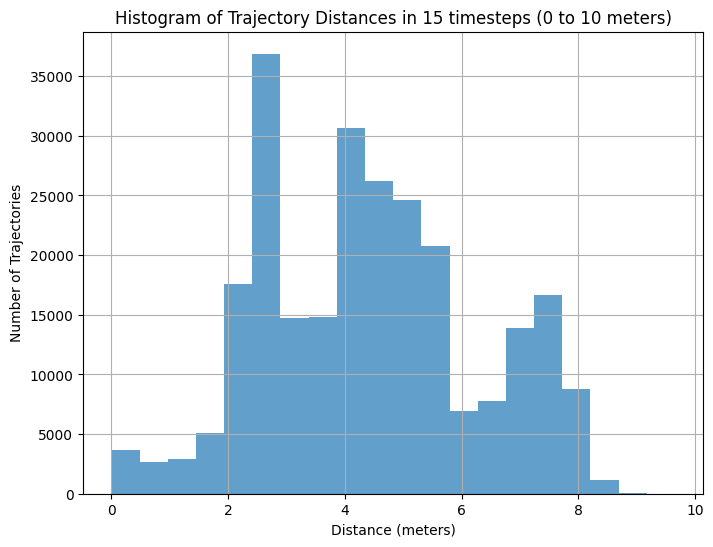

Bin 1: 0.00 to 0.50 meters, Count: 3751
Bin 2: 0.50 to 1.00 meters, Count: 2732
Bin 3: 1.00 to 1.50 meters, Count: 3149
Bin 4: 1.50 to 2.00 meters, Count: 5948
Bin 5: 2.00 to 2.50 meters, Count: 22297
Bin 6: 2.50 to 3.00 meters, Count: 35512
Bin 7: 3.00 to 3.50 meters, Count: 12827
Bin 8: 3.50 to 4.00 meters, Count: 19284
Bin 9: 4.00 to 4.50 meters, Count: 33494
Bin 10: 4.50 to 5.00 meters, Count: 24279
Bin 11: 5.00 to 5.50 meters, Count: 26416
Bin 12: 5.50 to 6.00 meters, Count: 14589
Bin 13: 6.00 to 6.50 meters, Count: 6264
Bin 14: 6.50 to 7.00 meters, Count: 10746
Bin 15: 7.00 to 7.50 meters, Count: 16888
Bin 16: 7.50 to 8.00 meters, Count: 14545
Bin 17: 8.00 to 8.50 meters, Count: 3005
Bin 18: 8.50 to 9.00 meters, Count: 265
Bin 19: 9.00 to 9.50 meters, Count: 7
Bin 20: 9.50 to 10.00 meters, Count: 2


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_trajectory_lengths(trajectories):
    """
    Calculates the Euclidean distance between the first and last point of each trajectory.
    
    Parameters:
    - trajectories: np.array of shape (n_trajectories, n_steps, 2)
    
    Returns:
    - A NumPy array of trajectory lengths (distances).
    """
    start_points = trajectories[:, 0, :]  # First point of each trajectory
    end_points = trajectories[:, -1, :]   # Last point of each trajectory
    distances = np.linalg.norm(end_points - start_points, axis=1)  # Euclidean distance
    return distances

def plot_limited_distance_histogram(distances, bins=10, distance_limit=10):
    """
    Plots a histogram of the trajectory distances limited to a specific range.
    
    Parameters:
    - distances: NumPy array of trajectory distances.
    - bins: Number of bins for the histogram.
    - distance_limit: Maximum distance to be included in the histogram.
    """
    # Filter distances to be less than or equal to the distance limit
    filtered_distances = distances[distances <= distance_limit]
    
    # Create the histogram and get the bin ranges
    hist, bin_edges = np.histogram(filtered_distances, bins=bins, range=(0, distance_limit))
    
    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(filtered_distances, bins=bins, alpha=0.7)
    
    plt.title(f'Histogram of Trajectory Distances in 15 timesteps (0 to {distance_limit} meters)')
    plt.xlabel('Distance (meters)')
    plt.ylabel('Number of Trajectories')
    plt.grid(True)
    plt.show()
    
    # Print the bin ranges and the counts
    for i in range(len(bin_edges) - 1):
        print(f"Bin {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} meters, Count: {hist[i]}")
    
# Example usage
# Replace this with your actual trajectories array
# trajectories = np.random.rand(100, 15, 2)  # 100 trajectories of 15 steps (2D)

# Calculate distances from first to last point
distances = calculate_trajectory_lengths(seq)

# Plot the histogram of distances, limited to 10 meters
plot_limited_distance_histogram(distances, bins=20, distance_limit=10)


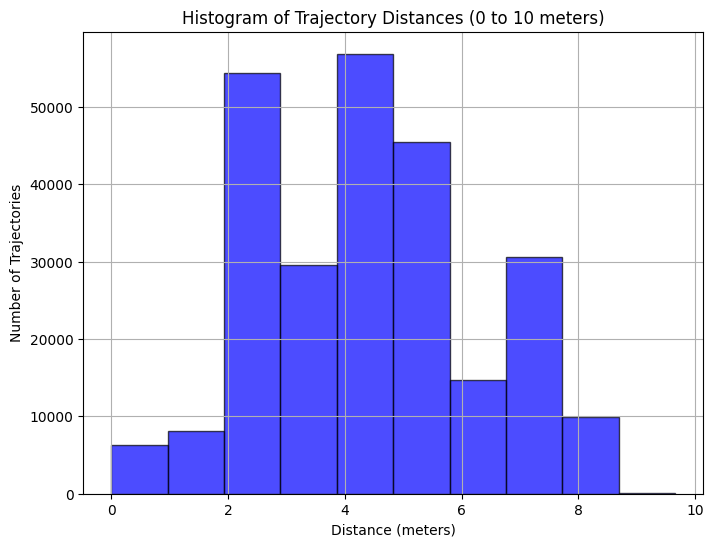

Bin 1: 0.00 to 1.00 meters, Count: 6483
Bin 2: 1.00 to 2.00 meters, Count: 9097
Bin 3: 2.00 to 3.00 meters, Count: 57809
Bin 4: 3.00 to 4.00 meters, Count: 32111
Bin 5: 4.00 to 5.00 meters, Count: 57773
Bin 6: 5.00 to 6.00 meters, Count: 41005
Bin 7: 6.00 to 7.00 meters, Count: 17010
Bin 8: 7.00 to 8.00 meters, Count: 31433
Bin 9: 8.00 to 9.00 meters, Count: 3270
Bin 10: 9.00 to 10.00 meters, Count: 9
Range containing 75% of distances: 0.00 to 5.55 meters
Range containing 80% of distances: 0.00 to 6.04 meters


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_trajectory_lengths(trajectories):
    """
    Calculates the Euclidean distance between the first and last point of each trajectory.
    
    Parameters:
    - trajectories: np.array of shape (n_trajectories, n_steps, 2)
    
    Returns:
    - A NumPy array of trajectory lengths (distances).
    """
    start_points = trajectories[:, 0, :]  # First point of each trajectory
    end_points = trajectories[:, -1, :]   # Last point of each trajectory
    distances = np.linalg.norm(end_points - start_points, axis=1)  # Euclidean distance
    return distances

def plot_limited_distance_histogram(distances, bins=10, distance_limit=10):
    """
    Plots a histogram of the trajectory distances limited to a specific range.
    
    Parameters:
    - distances: NumPy array of trajectory distances.
    - bins: Number of bins for the histogram.
    - distance_limit: Maximum distance to be included in the histogram.
    """
    # Filter distances to be less than or equal to the distance limit
    filtered_distances = distances[distances <= distance_limit]
    
    # Create the histogram and get the bin ranges
    hist, bin_edges = np.histogram(filtered_distances, bins=bins, range=(0, distance_limit))
    
    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(filtered_distances, bins=bins, color='blue', edgecolor='black', alpha=0.7)
    
    plt.title(f'Histogram of Trajectory Distances (0 to {distance_limit} meters)')
    plt.xlabel('Distance (meters)')
    plt.ylabel('Number of Trajectories')
    plt.grid(True)
    plt.show()
    
    # Print the bin ranges and the counts
    for i in range(len(bin_edges) - 1):
        print(f"Bin {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} meters, Count: {hist[i]}")

def calculate_percentile_range(distances, percentile):
    """
    Calculates the distance range that contains up to the given percentile of the distances.
    
    Parameters:
    - distances: NumPy array of trajectory distances.
    - percentile: The percentile (e.g., 75 or 80) to calculate the distance range for.
    
    Returns:
    - A tuple representing the range from the minimum distance to the specified percentile distance.
    """
    min_distance = np.min(distances)
    percentile_distance = np.percentile(distances, percentile)
    return (min_distance, percentile_distance)

# Example usage
# Replace this with your actual trajectories array
# trajectories = np.random.rand(100, 15, 2)  # 100 trajectories of 15 steps (2D)

# Calculate distances from first to last point
distances = calculate_trajectory_lengths(seq)

# Plot the histogram of distances, limited to 10 meters
plot_limited_distance_histogram(distances, bins=10, distance_limit=10)

# Calculate the range for the 75th percentile
percentile_75_range = calculate_percentile_range(distances, 75)
print(f"Range containing 75% of distances: {percentile_75_range[0]:.2f} to {percentile_75_range[1]:.2f} meters")

# Calculate the range for the 80th percentile
percentile_80_range = calculate_percentile_range(distances, 80)
print(f"Range containing 80% of distances: {percentile_80_range[0]:.2f} to {percentile_80_range[1]:.2f} meters")


# Visualising Individual Trajectories

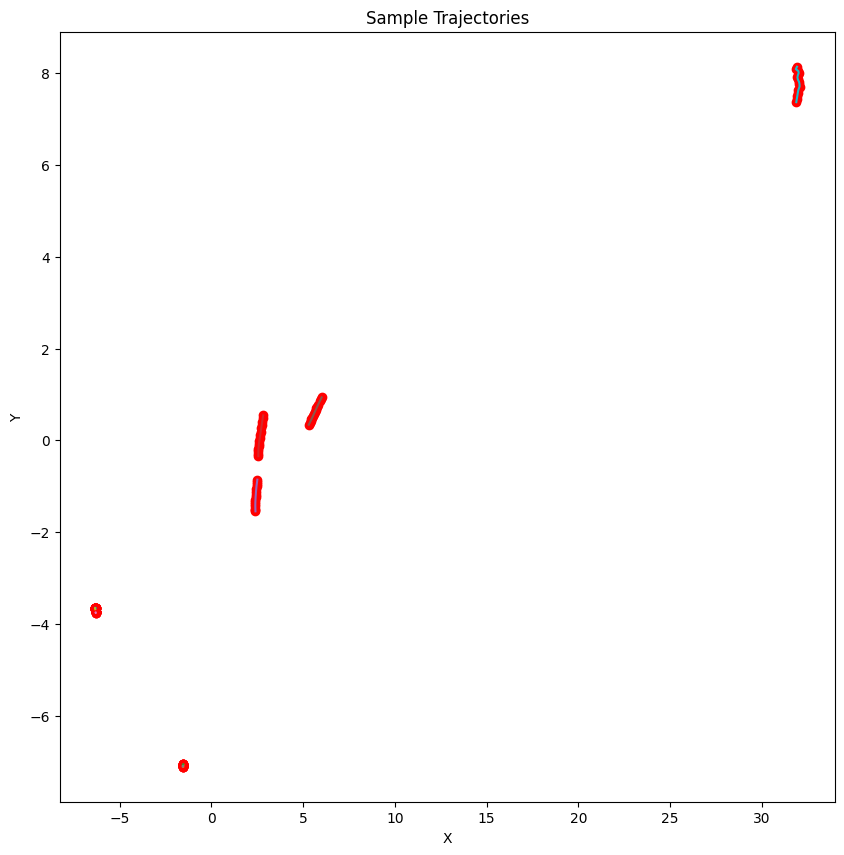

In [8]:
def plot_trajectory(trajectory, label=None):
    x, y = trajectory[:, 0], trajectory[:, 1]
    plt.plot(x, y, label=label)
    plt.scatter(x, y, c='r')  # To show individual points
    plt.xlabel('X')
    plt.ylabel('Y')

# Assuming `trajectories` is an array of shape (num_samples, sequence_length, 2)
plt.figure(figsize=(10, 10))
for i in range(10):  # Plot 10 sample trajectories
    plot_trajectory(seq[i+60])

plt.title('Sample Trajectories')
plt.show()


# Noise analysis

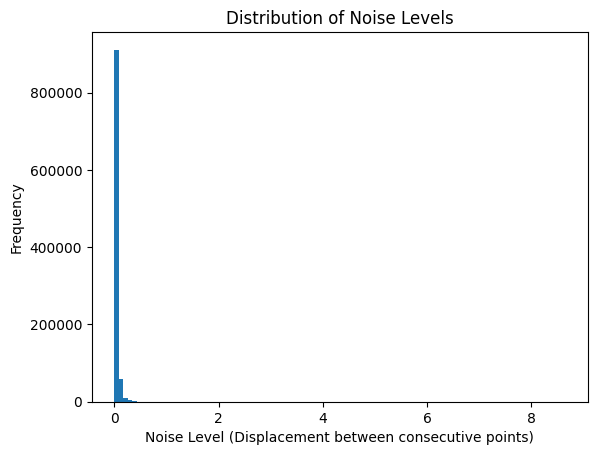

In [29]:
def calculate_noise(trajectories):
    # Differences between consecutive points
    differences = np.diff(trajectories, axis=1)
    # Magnitude of these differences (Euclidean distance)
    noise_levels = np.linalg.norm(differences, axis=-1)
    return noise_levels

noise_levels = calculate_noise(seq)

# Analyze the distribution of noise levels
plt.hist(noise_levels.flatten(), bins=100)
plt.title('Distribution of Noise Levels')
plt.xlabel('Noise Level (Displacement between consecutive points)')
plt.ylabel('Frequency')
plt.show()


In [30]:
print(noise_levels.mean())
print(noise_levels.var())

0.03412926966193831
0.015124943273293615


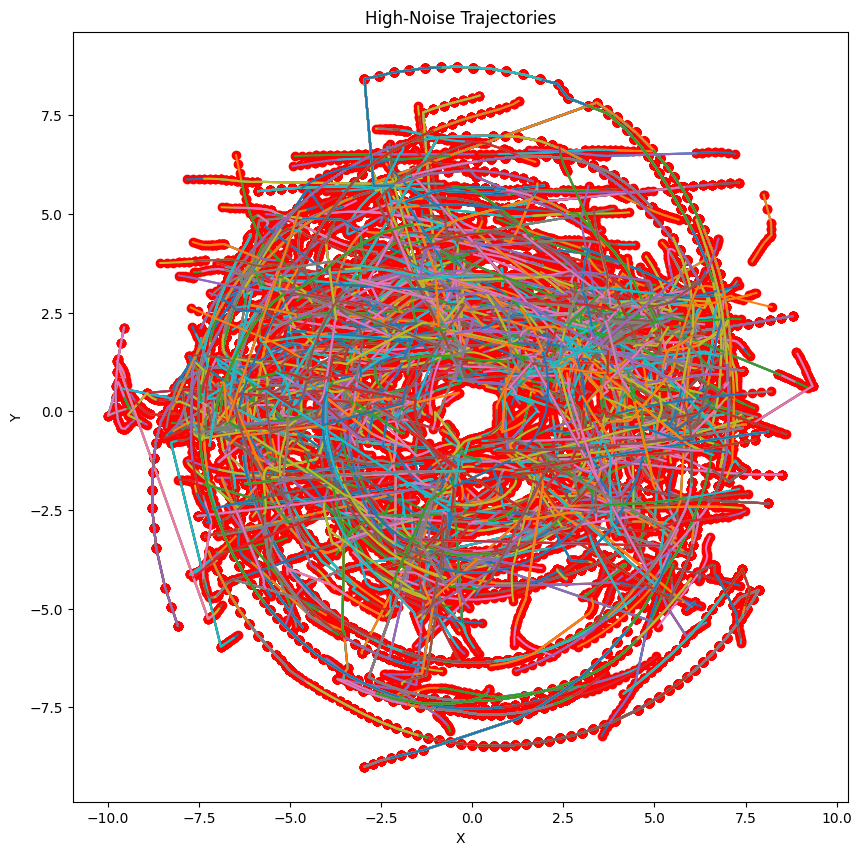

In [31]:
# Identifying high noise trajectories
high_noise_threshold = np.mean(noise_levels) + 2 * np.std(noise_levels)
high_noise_indices = np.where(noise_levels > high_noise_threshold)

# Plot high-noise trajectories
plt.figure(figsize=(10, 10))
for idx in high_noise_indices[0]:
    plot_trajectory(seq[idx])
plt.title('High-Noise Trajectories')
plt.show()


/home/annalena/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


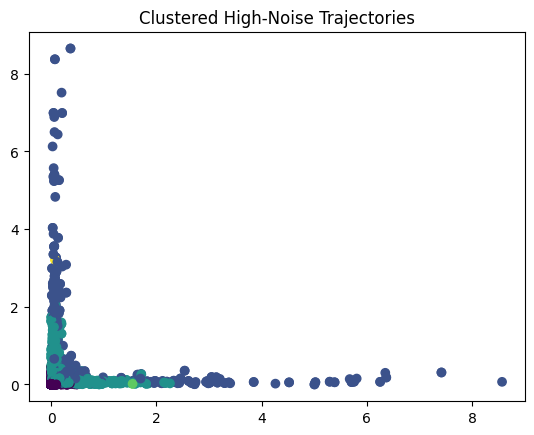

In [14]:
from sklearn.cluster import KMeans

# Example: KMeans clustering on trajectory data
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(noise_levels)

plt.scatter(noise_levels[:, 0], noise_levels[:, 1], c=clusters)
plt.title('Clustered High-Noise Trajectories')
plt.show()


# Curvature Analysis

/tmp/ipykernel_622/264403433.py:5: RuntimeWarning: invalid value encountered in divide
  directions = differences / np.linalg.norm(differences, axis=-1, keepdims=True)


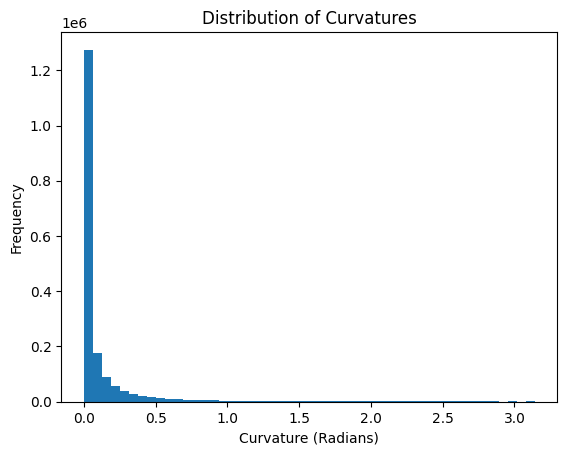

In [15]:
def calculate_curvature(trajectories):
    # Differences between consecutive points
    differences = np.diff(trajectories, axis=1)
    # Normalize vectors to get directions
    directions = differences / np.linalg.norm(differences, axis=-1, keepdims=True)
    # Compute dot product between consecutive directions to get cos(theta)
    dot_products = np.einsum('ijk,ijk->ij', directions[:, :-1, :], directions[:, 1:, :])
    # Convert to angles (in radians)
    angles = np.arccos(np.clip(dot_products, -1.0, 1.0))
    return angles

curvatures = calculate_curvature(seq)

# Analyze the distribution of curvatures
plt.hist(curvatures.flatten(), bins=50)
plt.title('Distribution of Curvatures')
plt.xlabel('Curvature (Radians)')
plt.ylabel('Frequency')
plt.show()

In [16]:
np.nanvar(curvatures)

0.11266829647919056

## Categorizing Trajectories: Straight vs Curved

In [17]:
def categorize_trajectories(curvatures, threshold=0.1):
    # Count number of significant curvature changes in each trajectory
    significant_curvatures = (curvatures > threshold).sum(axis=1)
    straight_trajectories = significant_curvatures == 0
    curved_trajectories = significant_curvatures > 0
    return straight_trajectories, curved_trajectories

straight_trajectories, curved_trajectories = categorize_trajectories(curvatures)

print(f"Straight trajectories: {straight_trajectories.sum()}")
print(f"Curved trajectories: {curved_trajectories.sum()}")

Straight trajectories: 40648
Curved trajectories: 100728


## Statistical Analysis

In [18]:
mean_noise = np.mean(noise_levels)
std_noise = np.std(noise_levels)
mean_curvature = np.nanmean(curvatures)
std_curvature = np.nanstd(curvatures)

print(f"Mean Noise Level: {mean_noise:.2f}, Std: {std_noise:.2f}")
print(f"Mean Curvature: {mean_curvature:.2f}, Std: {std_curvature:.2f}")

Mean Noise Level: 0.03, Std: 0.12
Mean Curvature: 0.13, Std: 0.34


# Outlier Detection

In [19]:
from sklearn.ensemble import IsolationForest
trajectories = seq.copy()

# Flatten trajectories for outlier detection
flattened_trajectories = trajectories.reshape(trajectories.shape[0], -1)
isolation_forest = IsolationForest(contamination=0.01)
outliers = isolation_forest.fit_predict(flattened_trajectories)

print(f"Number of outliers: {np.sum(outliers == -1)}")


Number of outliers: 1414


# Length of trajectories

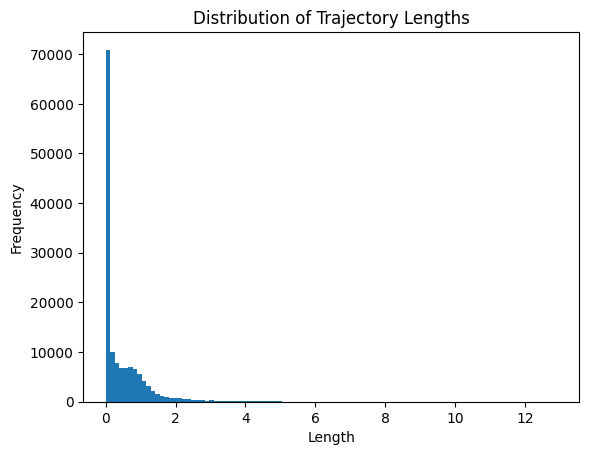

In [20]:
trajectory_lengths = np.linalg.norm(np.diff(trajectories, axis=1), axis=-1).sum(axis=1)

plt.hist(trajectory_lengths, bins=100)
plt.title('Distribution of Trajectory Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Temporal Analysis

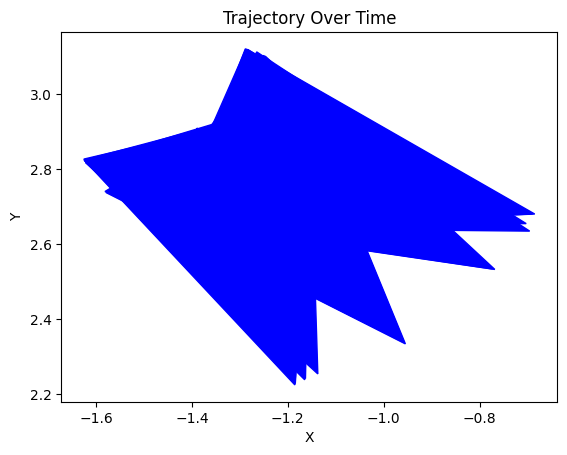

In [23]:
def plot_trajectory_over_time(trajectory):
    for t in range(trajectory.shape[0] - 1):
        plt.arrow(trajectory[t, 0], trajectory[t, 1],
                  trajectory[t+1, 0] - trajectory[t, 0],
                  trajectory[t+1, 1] - trajectory[t, 1],
                  head_width=0.5, head_length=0.7, fc='blue', ec='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Trajectory Over Time')
    plt.show()

# Plot a sample trajectory with time dynamics
plot_trajectory_over_time(trajectories[2])